In [1]:
from cycler import cycler
import matplotlib.pyplot as plt
import numpy
import xarray

In [2]:
# 100-day time averages
M4 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/longmean_*.nc', decode_times=False)
M8 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.125deg_N15_baseline_hmix5/longmean_*.nc', decode_times=False)
M16 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.0625deg_N15_baseline_hmix5/longmean_*.nc', decode_times=False)
M32 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5/longmean_*.nc', decode_times=False)

In [3]:
# Select data and cleanup
UH4 = M4.uh.isel(xq=0).drop('xq')
UH8 = M8.uh.isel(xq=0).drop('xq')
UH16 = M16.uh.isel(xq=0).drop('xq')
UH32 = M32.uh.isel(xq=0).drop('xq')

In [4]:
# Recorded start time of segment
Toff4 = 1.5*UH4.time[0]-0.5*UH4.time[1]
Toff8 = 1.5*UH8.time[0]-0.5*UH8.time[1]
Toff16 = 1.5*UH16.time[0]-0.5*UH16.time[1]
Toff32 = 1.5*UH32.time[0]-0.5*UH32.time[1]
Toff4, Toff8, Toff16, Toff32

(<xarray.DataArray 'time' ()>
 array(0.),
 <xarray.DataArray 'time' ()>
 array(0.),
 <xarray.DataArray 'time' ()>
 array(0.),
 <xarray.DataArray 'time' ()>
 array(0.))

In [5]:
%time LT4=UH4.sum(dim=('yh','zl')).compute()

CPU times: user 402 ms, sys: 1.19 s, total: 1.59 s
Wall time: 24.8 s


In [6]:
%time LT8=UH8.sum(dim=('yh','zl')).compute()

CPU times: user 111 ms, sys: 427 ms, total: 538 ms
Wall time: 6.71 s


In [7]:
%time LT16=UH16.sum(dim=('yh','zl')).compute()

CPU times: user 226 ms, sys: 1.3 s, total: 1.53 s
Wall time: 11.2 s


In [8]:
%time LT32=UH32.sum(dim=('yh','zl')).compute()

CPU times: user 255 ms, sys: 2.72 s, total: 2.97 s
Wall time: 15.3 s


In [9]:
# 5-day time averages
m4 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/averages_*.nc', decode_times=False)
m8 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.125deg_N15_baseline_hmix5/averages_*.nc', decode_times=False)
m16 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.0625deg_N15_baseline_hmix5/averages_*.nc', decode_times=False)
m32 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5/averages_*.nc', decode_times=False)

In [10]:
# Select data and cleanup
uh4 = m4.uh.isel(xq=0).drop('xq')
uh8 = m8.uh.isel(xq=0).drop('xq')
uh16 = m16.uh.isel(xq=0).drop('xq')
uh32 = m32.uh.isel(xq=0).drop('xq')

In [11]:
# Recorded start time of segment
toff4 = 1.5*uh4.time[0]-0.5*uh4.time[1]
toff8 = 1.5*uh8.time[0]-0.5*uh8.time[1]
toff16 = 1.5*uh16.time[0]-0.5*uh16.time[1]
toff32 = 1.5*uh32.time[0]-0.5*uh32.time[1]
toff4, toff8, toff16, toff32

(<xarray.DataArray 'time' ()>
 array(30000.),
 <xarray.DataArray 'time' ()>
 array(0.),
 <xarray.DataArray 'time' ()>
 array(4000.),
 <xarray.DataArray 'time' ()>
 array(2000.))

In [12]:
%time T4=uh4.sum(dim=('yh','zl')).compute()

CPU times: user 446 ms, sys: 1.46 s, total: 1.91 s
Wall time: 29.1 s


In [13]:
%time T8=uh8.sum(dim=('yh','zl')).compute()

CPU times: user 2.19 s, sys: 8.64 s, total: 10.8 s
Wall time: 2min 6s


In [14]:
%time T16=uh16.sum(dim=('yh','zl')).compute()

CPU times: user 846 ms, sys: 5.33 s, total: 6.18 s
Wall time: 44.7 s


In [15]:
%time T32=uh32.sum(dim=('yh','zl')).compute()

CPU times: user 1.42 s, sys: 15.6 s, total: 17 s
Wall time: 1min 25s


In [16]:
# Adjust times so series are contiguous
def adjtime(prev,next):
    start = 1.5*next.time[0]-0.5*next.time[1]
    end = 1.5*prev.time[-1]-0.5*prev.time[-2]
    return (next.time-start)+end
T8['time'] = adjtime(T4,T8)+toff8
T16['time'] = adjtime(T8,T16)+toff16
T32['time'] = adjtime(T16,T32)+toff32
LT8['time'] = adjtime(LT4,LT8)+Toff8
LT16['time'] = adjtime(LT8,LT16)+Toff16
LT32['time'] = adjtime(LT16,LT32)+Toff32

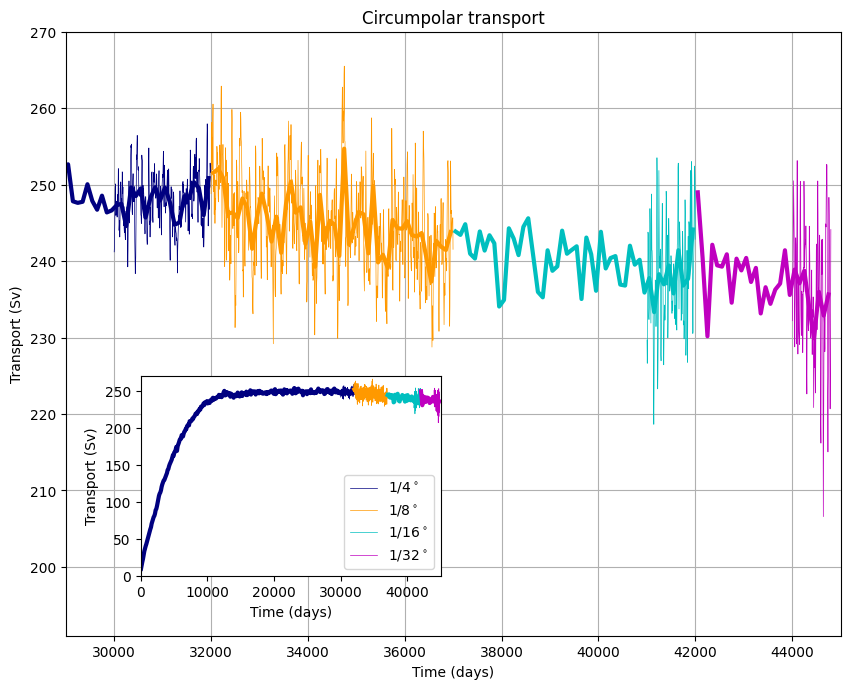

In [24]:
fig,ax = plt.subplots(1,1,figsize=(10,8),dpi=100)
def plot(ax, lw1=0.5, lw2=3):
    cyc = cycler(color=[[0,0,0.5], [1,.6,0], 'c', 'm'])
    ax.set_prop_cycle( cyc )
    (T4/1e6).plot(linewidth=lw1, label='1/4$^\circ$')
    (T8/1e6).plot(linewidth=lw1, label='1/8$^\circ$')
    (T16/1e6).plot(linewidth=lw1, label='1/16$^\circ$')
    (T32/1e6).plot(linewidth=lw1, label='1/32$^\circ$')
    ax.set_prop_cycle( cyc )
    (LT4/1e6).plot(linewidth=lw2)
    (LT8/1e6).plot(linewidth=lw2)
    (LT16/1e6).plot(linewidth=lw2)
    (LT32/1e6).plot(linewidth=lw2)
    plt.xlabel('Time (days)'); plt.ylabel('Transport (Sv)');
plot(ax)
plt.xlim(29000,45000); plt.ylim(191,270); plt.title('Circumpolar transport'); plt.grid();

ax = plt.axes((.2,.2,.3,.25))
plot(ax)
plt.xlim(0,45000); plt.ylim(0,270); plt.legend();
plt.savefig('fig04-circumpolar-transport-time-series-HMIX5.png')

In [23]:
print( 'End 1/4 T  =',T4.isel(time=slice(-200,-1)).mean(dim='time').values/1e6,'Sv')
print( 'Beg 1/8 T  =',T8.isel(time=slice(0,200)).mean(dim='time').values/1e6,'Sv')
print( 'End 1/8 T  =',T8.isel(time=slice(-200,-1)).mean(dim='time').values/1e6,'Sv')
print( 'Beg 1/16 T =',T16.isel(time=slice(0,200)).mean(dim='time').values/1e6,'Sv')
print( 'End 1/16 T =',T16.isel(time=slice(-200,-1)).mean(dim='time').values/1e6,'Sv')
print( 'End 1/16 T =',T32.isel(time=slice(-200,-1)).mean(dim='time').values/1e6,'Sv')
print( 'all 1/32 T =',T32.mean(dim='time').values/1e6,'Sv')

End 1/4 T  = 248.044624 Sv
Beg 1/8 T  = 247.525744 Sv
End 1/8 T  = 242.298448 Sv
Beg 1/16 T = 238.157008 Sv
End 1/16 T = 238.13344 Sv
End 1/16 T = 235.33664 Sv
all 1/32 T = 235.391616 Sv


In [21]:
LT4.to_netcdf('LT4-HMIX5.nc')
LT8.to_netcdf('LT8-HMIX5.nc')
LT16.to_netcdf('LT16-HMIX5.nc')
LT32.to_netcdf('LT32-HMIX5.nc')